In [46]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
def derivative(f, x0): # сие вернетъ производную от f в x0
    return (f(x0 + 1e-5) - f(x0 - 1e-5)) / 2e-5

In [48]:
def newthon(f, x0, N):
    X = np.zeros(N) # тута мы созидаемъ массивъ нулей 
    X[0] = x0 # нулевой элементъ массива нулей - икс НОЛЬ (начальное приближовывание)
    for i in range(1, N):
        X[i] = X[i - 1] - f(X[i - 1]) / derivative(f, X[i - 1]) # наполняемъ массивъ аки в методе Ньютона
    return X # и вертаемъ яго в задъ

In [49]:
def f(x): # будемъ искать нуль у функции
    return x ** 2 - np.cos(x) # коя что то вертаетъ в задъ

0.8241323123025224


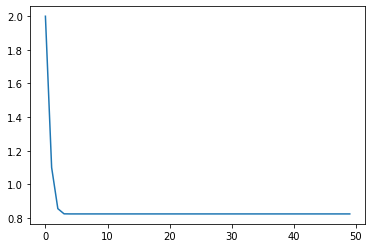

In [56]:
N = 50 # итераций наших число
X = newthon(f, 2, N) # взываемъ к методу Ньютона
plt.plot(np.linspace(0, N - 1, N), X); # начертаемъ оное на холсте
print(X[-1]) # и узрим к чему сошелся методъ

In [51]:
def f1(X):
    return X[0] + X[1] - 3
def f2(X):
    return X[0] ** 2 + X[1] ** 2 - 9
F = [f1, f2]

In [52]:
def Newthon(F, Xo, N):
    n = Xo.size
    X = np.zeros([N, n])
    X[0] = Xo
    def __deriv(F, X0, i, j, eps = 1e-5):
        dx = np.zeros(n)
        dx[j] += eps
        return (F[i](X0 + dx) - F[i](X0 - dx)) / (2. * eps)
    def __jacobian(F, X0):
        J = np.zeros([n, n])
        for i in range(0, n):
            for j in range(0, n):
                dF = __deriv(F, X0, i, j)
                J[i][j] = dF
        return J
    for i in range(1, N):
        J = np.linalg.det(__jacobian(F, X[i - 1]))
        X[i] = X[i - 1] - np.array([F[k](X[i - 1]) for k in range(n)]) / J
    return X

[8.96805167e-05 3.00000000e+00]


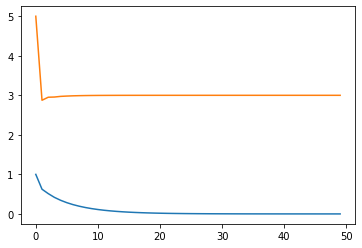

In [57]:
x = Newthon(F, np.array([1, 5]), N)
print(x[-1])
plt.plot(np.linspace(0, N - 1, N), x[:, 0])
plt.plot(np.linspace(0, N - 1, N), x[:, 1])
plt.show()

In [54]:
def g(X):
    return np.cos(X[0]) - 1. / X[0]

In [55]:
y = Newthon([g], np.array([-10.]), 10)
print(y)

[[-10.        ]
 [-11.38397437]
 [-10.87563809]
 [-10.90377839]
 [-10.90373353]
 [-10.90373353]
 [-10.90373353]
 [-10.90373353]
 [-10.90373353]
 [-10.90373353]]
